In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Height')

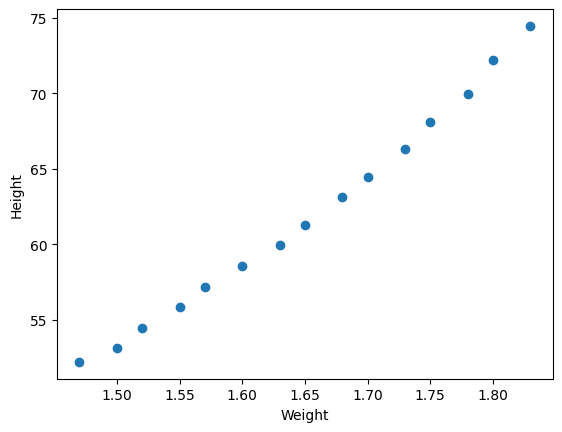

In [32]:
df = pd.read_csv("data.csv")

plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [33]:
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


In [30]:
import seaborn as sns

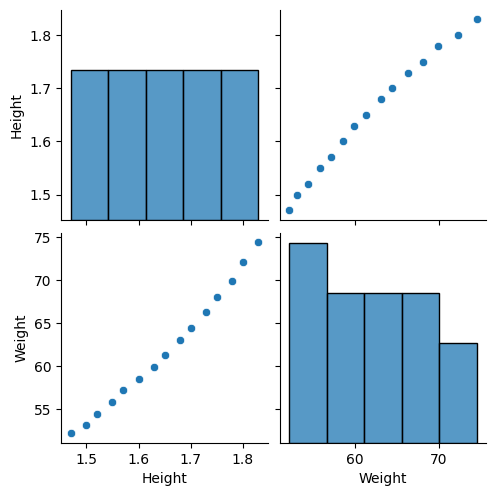

In [31]:
sns.pairplot(df);

In [42]:
X_series = df[["Weight"]] ### should in series
np.array(X_series).shape

(15, 1)

In [43]:
Y_series = df[["Height"]]

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_series,Y_series,test_size=0.25,random_state=42)

In [47]:
print(X_train)
print(Y_train)

    Weight
5    58.57
8    63.11
2    54.48
1    53.12
14   74.46
4    57.20
7    61.29
10   66.28
12   69.92
3    55.84
6    59.93
    Height
5     1.60
8     1.68
2     1.52
1     1.50
14    1.83
4     1.57
7     1.65
10    1.73
12    1.78
3     1.55
6     1.63


##### standardization => convert to z score => mean = 0 variance = 1

In [48]:
from sklearn.preprocessing import StandardScaler

array([[-4.27817678e-01],
       [ 2.86021775e-01],
       [-1.07090212e+00],
       [-1.28473949e+00],
       [ 2.07062041e+00],
       [-6.43227381e-01],
       [-1.42939418e-04],
       [ 7.84451526e-01],
       [ 1.35678096e+00],
       [-8.57064750e-01],
       [-2.13980309e-01]])

In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-4.27817678e-01],
       [ 2.86021775e-01],
       [-1.07090212e+00],
       [-1.28473949e+00],
       [ 2.07062041e+00],
       [-6.43227381e-01],
       [-1.42939418e-04],
       [ 7.84451526e-01],
       [ 1.35678096e+00],
       [-8.57064750e-01],
       [-2.13980309e-01]])

In [113]:
X_test = scaler.transform(X_test,copy=True)
X_test

array([[64.47],
       [68.1 ],
       [52.21],
       [72.19]])

In [123]:
Y_train = scaler.fit_transform(Y_train)
Y_test
Y_test = scaler.transform(Y_test)
Y_test

array([[ 0.58886337],
       [ 1.07958285],
       [-1.66844622],
       [ 1.57030232]])

In [53]:
#### apply linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [71]:
regression.fit(X_train,Y_train)

LinearRegression()

In [74]:
regression.coef_
regression.intercept_

array([-8.83258247e-17])

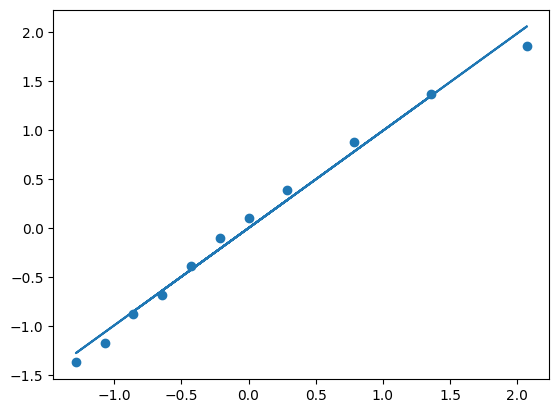

In [78]:
res_y = regression.predict(X_test)
res_y
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [79]:
regression.predict(X_train)

array([[-4.25676322e-01],
       [ 2.84590151e-01],
       [-1.06554193e+00],
       [-1.27830898e+00],
       [ 2.06025633e+00],
       [-6.40007835e-01],
       [-1.42223963e-04],
       [ 7.80525111e-01],
       [ 1.34998986e+00],
       [-8.52774884e-01],
       [-2.12909273e-01]])

In [124]:
y_pred = regression.predict(X_test)
y_pred

array([[64.14730835],
       [67.75913911],
       [51.94867332],
       [71.82866744]])

In [149]:
scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_test

array([[ 0.03047754],
       [ 0.51677846],
       [-1.61196028],
       [ 1.06470428]])

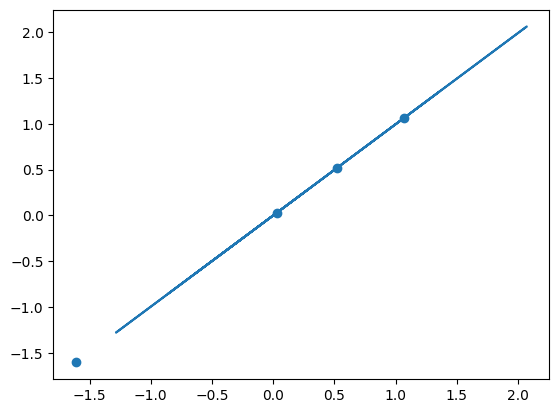

In [150]:
y_pred = regression.predict(X_test)
plt.plot(X_train,regression.predict(X_train))
plt.scatter(X_test,y_pred)

In [151]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse =mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.22421149915777872
0.4248527235960275
0.4735097666973499


In [152]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
score

0.8540612527568064

In [153]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7810918791352097

In [154]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.8 MB 13.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.8 MB 10.7 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.8 MB 8.9 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 8.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 7.8 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 7.2 MB/s eta 0:00:00


In [155]:
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

In [157]:
model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              991.4
Date:                Mon, 03 Feb 2025   Prob (F-statistic):                    2.45e-11
Time:                        20:36:33   Log-Likelihood:                          9.7281
No. Observations:                  11   AIC:                                     -17.46
Df Residuals:                      10   BIC:                                     -17.06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\MachineLearning\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
